In [1]:
import math
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 12]

In [2]:
df_train = pd.read_csv('E:/github/BNP Paribas/train.csv')
df_test = pd.read_csv('E:/github/BNP Paribas/test.csv')
df_sample = pd.read_csv('E:/github/BNP Paribas/sample_submission.csv')

In [3]:
df_train.sample(10)

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
74186,148020,0,6.842349e-01,5.219796,C,4.649895,9.636313,4.641702,2.958854,3.046113,...,6.929825,3.928301,2.447148e+00,CG,0.994484,3.502080,2.237874,0,1.087499,9.195397e-01
32954,66081,1,9.545121e-07,9.984077,C,4.856239,7.948891,3.542858,2.628571,0.014407,...,11.891893,1.229241,4.363563e-03,E,1.489916,0.857144,2.042677,1,0.608696,-1.425814e-07
45982,91962,1,3.112981e+00,8.706552,C,4.004997,6.610625,2.259616,2.932692,0.033742,...,6.419753,2.895396,1.120165e-02,BJ,2.036994,2.929688,1.497907,0,1.737705,2.641509e+00
101528,202942,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BK,NaN,NaN,NaN,0,NaN,NaN
104787,209465,0,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BX,NaN,NaN,NaN,0,NaN,NaN
42503,85018,1,2.224683e+00,8.093891,C,3.927849,5.124411,2.075949,2.753164,0.156154,...,8.487085,3.389966,1.583519e-07,A,1.402689,6.728640,1.081318,0,1.526436,2.289156e+00
96206,192280,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,CD,NaN,NaN,NaN,0,NaN,NaN
94726,189326,1,5.848269e-01,7.062828,C,5.060265,10.733069,2.550053,2.781876,1.645662,...,6.134453,3.593864,3.535592e+00,N,2.003366,2.983404,5.190216,0,1.075758,8.450702e-01
108113,216170,1,2.034458e+00,4.330087,C,2.516853,8.325109,1.994135,2.038123,1.828701,...,7.808565,7.815244,1.658459e+00,AW,1.584993,4.673753,1.511699,0,3.179857,1.357465e+00
98263,196393,0,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BM,NaN,NaN,NaN,0,NaN,NaN


In [4]:
df_test.sample(10)

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
41882,83725,1.263277,5.062478,C,4.923866,9.827519,2.321699,2.708650,2.692592,4.620689,...,3.103448,3.471457,0.639871,AK,1.821652,4.424317,2.676476,0,1.198879,1.682242
81987,164265,0.689869,4.434203,C,3.753566,8.912805,2.299566,1.970167,0.595804,9.778869,...,7.371007,3.429081,0.505413,CG,1.559712,2.563703,1.615080,0,2.119873,0.714285
104374,208862,2.536991,3.372790,C,1.796169,6.134388,1.559004,1.876578,0.806652,7.806004,...,3.418014,11.589566,0.491654,BM,1.489827,0.771382,0.804056,1,5.553846,1.052632
103117,206319,NaN,NaN,C,NaN,8.838066,NaN,NaN,0.343122,NaN,...,NaN,NaN,0.061205,BW,NaN,NaN,1.722363,0,NaN,NaN
114056,228043,1.093597,6.520806,C,3.560550,8.307722,2.206897,2.246305,4.883136,5.188285,...,2.510460,9.799910,0.466668,H,1.733954,2.789409,1.694915,0,3.070176,0.685714
26009,51979,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AK,NaN,NaN,NaN,0,NaN,NaN
107116,214270,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BH,NaN,NaN,NaN,1,NaN,NaN
28142,56221,1.844926,5.276029,C,4.427037,9.672572,3.041635,3.236100,0.636787,9.486726,...,8.637168,2.891808,0.928488,CG,1.988072,2.047495,2.389182,1,1.010786,2.439025
73680,147714,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BM,NaN,NaN,NaN,1,NaN,NaN
33297,66474,2.800534,6.532190,C,3.907054,7.468774,1.994658,2.804986,1.732559,9.310344,...,6.810346,3.613601,0.363513,BM,1.644591,4.441230,1.128133,1,1.485713,2.905983


In [5]:
df_train.isnull().sum()

ID            0
target        0
v1        49832
v2        49796
v3         3457
          ...  
v127      49832
v128      48624
v129          0
v130      49843
v131      49895
Length: 133, dtype: int64

In [6]:
df_train.shape

(114321, 133)

In [7]:
n_observation = df_train.shape[0]
n_features = df_train.shape[1]
n_missing_values = df_train.apply(lambda x: x.isnull().any()).sum()

print('%s Observations, %s Features, %s features with missing values' % (n_observation, n_features, n_missing_values))

114321 Observations, 133 Features, 119 features with missing values


In [8]:
print('114 numeric features')
print('19 string features')
print(df_train.dtypes.value_counts())

114 numeric features
19 string features
float64    108
object      19
int64        6
dtype: int64


In [9]:
# Target variable
pred_col = 'target'
str_cols = df_train.columns[df_train.dtypes=='object']
num_cols = df_train.columns[(df_train.dtypes=='int64') | (df_train.dtypes=='float64')]

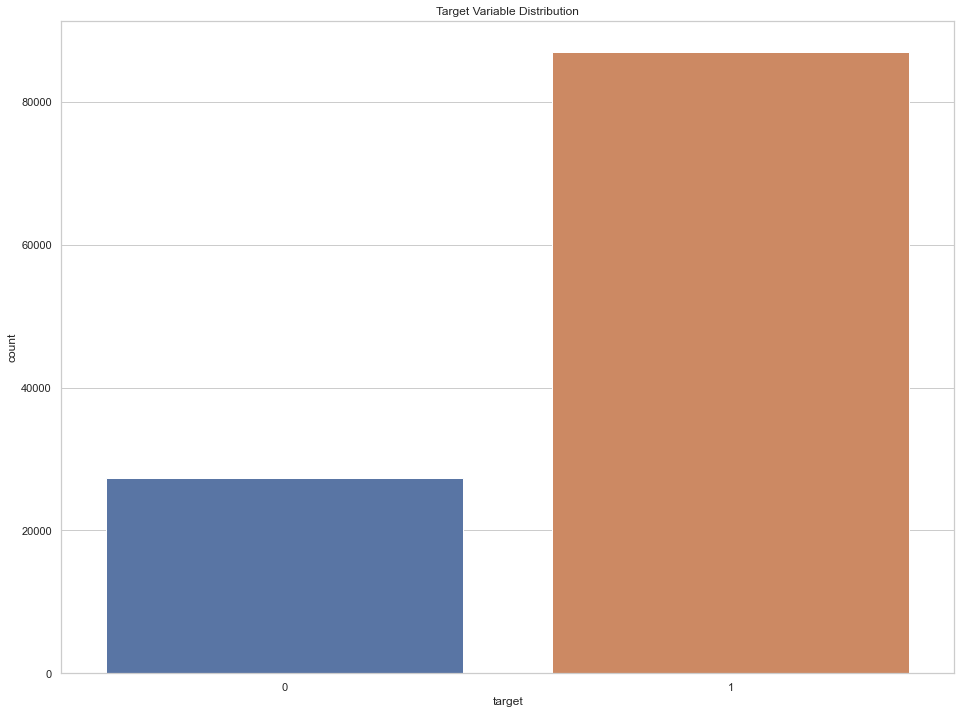

In [10]:
# The claims were suitable for an accelerated approval
sns.countplot(x="target", data=df_train)
plt.title('Target Variable Distribution')
plt.show()

In [11]:
df_train.info()
print("----------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 116.0+ MB
----------------------------


In [12]:
df_train.describe(include = 'O').transpose()

,count,unique,top,freq
v3,110864,3,C,110584
v22,113821,18210,AGDF,2386
v24,114321,5,E,55177
v30,54211,7,C,32178
v31,110864,3,A,88347
v47,114321,10,C,55425
v52,114318,12,J,11103
v56,107439,122,BW,11351
v66,114321,3,A,70353
v71,114321,9,F,75094


In [13]:
df_train.describe(exclude = 'O').transpose()

,count,mean,std,min,25%,50%,75%,max
ID,114321.0,114228.928228,65934.487362,3.000000e+00,57280.000000,114189.000000,171206.000000,228713.000000
target,114321.0,0.761199,0.426353,0.000000e+00,1.000000,1.000000,1.000000,1.000000
v1,64489.0,1.630686,1.082813,-9.996497e-07,0.913580,1.469550,2.136128,20.000001
v2,64525.0,7.464411,2.961676,-9.817614e-07,5.316428,7.023803,9.465497,20.000000
v4,64525.0,4.145098,1.148263,-6.475929e-07,3.487398,4.205991,4.833250,20.000000
...,...,...,...,...,...,...,...,...
v127,64489.0,3.239542,1.625988,-9.223798e-07,2.101900,2.963620,4.108146,19.999999
v128,65697.0,2.030373,1.074232,8.197812e-07,1.393830,1.798436,2.390158,20.000000
v129,114321.0,0.310144,0.693262,0.000000e+00,0.000000,0.000000,0.000000,11.000000
v130,64478.0,1.925763,1.264497,-9.901257e-07,1.106172,1.560138,2.332425,20.000000


The categorical variables are encoded into numbers

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(df_train.select_dtypes(include=numerics).columns)
df_train = df_train[numerical_vars]
df_train.shape

(114321, 114)

In [15]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop(labels=['target', 'ID'], axis=1),
    df_train['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

<IPython.core.display.Javascript object>

((80024, 112), (34297, 112))

Correlation matrix using Seaborn

<AxesSubplot:>

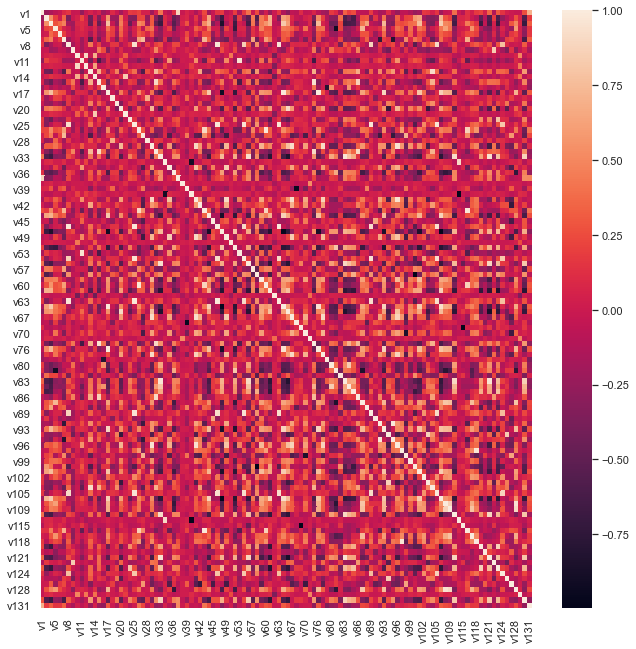

In [16]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

Brute force approach

In [17]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # Absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

55

55 features are highly correlated with other features in the training set

In [19]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((80024, 57), (34297, 57))

In [20]:
# Identifying columns with categorical data 
n_columns=df_train.columns.where(df_train.dtypes=='object')
n_columns=list(n_columns)
n_columns= [x for x in n_columns if str(x)!='nan']


# Dropping columns with categorical data
df_train=df_train.drop(n_columns, axis=1)

#Dropping null values in the rest of the Dataset.
df_train=df_train.dropna()     
df_train=df_train.reset_index()
# Standardizing the Data
n_columns=list(df_train.columns)
del n_columns[0:2]
m=df_train[n_columns].mean()
s=df_train[n_columns].std()

In [21]:
from sklearn.preprocessing import StandardScaler
features = n_columns
# Separating out the features
x = df_train.loc[:, features].values
# Separating out the target
y = df_train.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

# Showing the coveriance matrix
df_train[n_columns].cov()

,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
target,0.185479,-0.003310,0.044057,0.028459,0.018444,0.007639,0.008254,-0.013969,-0.009852,0.090409,...,-0.024484,0.001988,-0.057230,-0.007290,-0.000044,0.009215,0.014774,0.044244,-0.023795,0.013023
v1,-0.003310,1.140908,-0.639450,-0.149110,-0.146429,-0.002283,0.069098,0.457353,-0.043833,-0.026131,...,0.489781,-0.235069,0.751656,0.338177,0.016184,0.003228,-0.033464,-0.015511,0.330933,0.849600
v2,0.044057,-0.639450,8.610581,1.711443,1.221620,0.005614,0.588670,-2.964567,-0.068050,0.186569,...,-2.187030,0.830525,-4.184741,-1.574955,-0.145777,-0.037192,0.835868,0.142553,-2.049408,0.583019
v4,0.028459,-0.149110,1.711443,1.252083,0.621102,0.243092,0.309318,-0.495360,-0.477252,0.124429,...,-0.899023,0.043876,-1.914890,-0.099326,-0.064582,0.516642,0.605730,0.078884,-0.958900,0.404267
v5,0.018444,-0.146429,1.221620,0.621102,4.234373,0.297803,0.066170,0.008754,-0.701150,0.134331,...,-0.968438,0.017596,-1.190322,0.325372,-0.100082,-0.765459,1.312472,0.063433,-0.644012,0.341307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
v127,0.009215,0.003228,-0.037192,0.516642,-0.765459,0.144490,0.220158,-0.038689,0.401934,-0.014904,...,0.086952,0.278995,-0.547040,-0.160752,-0.062235,2.611094,-0.284376,0.013977,-0.445990,0.118801
v128,0.014774,-0.033464,0.835868,0.605730,1.312472,0.149586,0.058015,0.051669,-0.596790,0.086689,...,-0.544224,-0.124653,-0.703370,0.598307,-0.075635,-0.284376,1.157748,0.041664,-0.392057,0.291176
v129,0.044244,-0.015511,0.142553,0.078884,0.063433,0.017740,0.013277,-0.034112,-0.048714,0.461948,...,-0.069694,-0.004713,-0.158091,-0.010885,-0.005092,0.013977,0.041664,0.510021,-0.060770,0.025755
v130,-0.023795,0.330933,-2.049408,-0.958900,-0.644012,-0.202640,-0.441364,1.075663,0.218050,-0.101244,...,1.301207,-0.379970,2.176813,0.572649,0.043365,-0.445990,-0.392057,-0.060770,1.495325,-0.373427


In [22]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=35)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4', 'principal component 5', 'principal component 6','principal component 7', 'principal component 8', 'principal component 9','principal component 10','principal component 11', 'principal component 12', 'principal component 13','principal component 14', 'principal component 15','principal component 16', 'principal component 17', 'principal component 18','principal component 19', 'principal component 20','principal component 21', 'principal component 22', 'principal component 23','principal component 24', 'principal component 25','principal component 26', 'principal component 27', 'principal component 28','principal component 29', 'principal component 30','principal component 31', 'principal component 32', 'principal component 33','principal component 34', 'principal component 35',])
finalDf = pd.concat([principalDf, df_train[['target']]], axis = 1)

In [23]:
print(pca.explained_variance_ratio_.sum())
print(pca.explained_variance_ratio_*100)

0.9578811320880043
[23.90825632 14.04142228  9.54042251  4.78840878  4.70038909  3.52461578
  3.22496988  2.83036874  2.49136052  2.25520407  2.08630378  2.01092332
  1.92272323  1.75283678  1.54195568  1.48240161  1.35440749  1.29477067
  1.06809124  1.00641568  1.00055056  0.78081677  0.76779197  0.72134605
  0.69506964  0.66861245  0.61973268  0.60392538  0.54437662  0.51697937
  0.48035846  0.42446764  0.41788709  0.37537481  0.34457624]


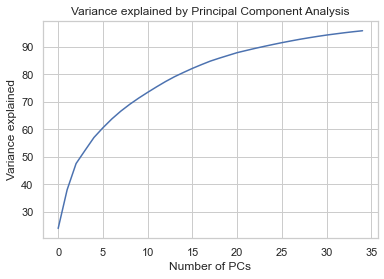

In [24]:
%matplotlib inline
a1=pca.explained_variance_ratio_*100
b1=a1
for i in range(len(a1)):
    if i>0:
        b1[i]=b1[i]+b1[i-1]
    else:
        continue



plt.plot(b1)
plt.xlabel('Number of PCs')
plt.ylabel('Variance explained')
plt.title('Variance explained by Principal Component Analysis')
plt.show()

In [25]:
# Random Forest
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [26]:
X = finalDf.iloc[:,0:35].values
y= finalDf.iloc[:,35:].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

<ipython-input-26-a218a4fb1fbc>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


In [27]:
# y_pred1=y_pred
y_pred1= np.rint(y_pred)
y_pred1=y_pred1.astype(int)
# print(type(y_pred1[1]))

from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 0.0024775224775224775
Mean Squared Error: 0.0024775224775224775
Root Mean Squared Error: 0.04977471725205958


In [28]:
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Confusion Matrix\n',confusion_matrix(y_test,y_pred1),end='\n\n')
print(classification_report(y_test,y_pred1),end='\n\n\n')
print('Over all test accuracy with Random Forests {}%'.format(accuracy_score(y_test, y_pred1)*100))

Confusion Matrix
 [[ 6159    62]
 [    0 18804]]

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6221
           1       1.00      1.00      1.00     18804

    accuracy                           1.00     25025
   macro avg       1.00      1.00      1.00     25025
weighted avg       1.00      1.00      1.00     25025



Over all test accuracy with Random Forests 99.75224775224774%


In [29]:
# navie bayes classification

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print('Confusion Matrix\n',confusion_matrix(y_test,y_pred),end='\n\n')
print(classification_report(y_test,y_pred),end='\n\n\n')
print('Over all test accuracy with Gaussian Navie Bayes {}%'.format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix
 [[ 5834   387]
 [    0 18804]]

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      6221
           1       0.98      1.00      0.99     18804

    accuracy                           0.98     25025
   macro avg       0.99      0.97      0.98     25025
weighted avg       0.98      0.98      0.98     25025



Over all test accuracy with Gaussian Navie Bayes 98.45354645354647%


C:\Users\ubjd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
# support vector classifier
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)


print('Confusion Matrix\n',confusion_matrix(y_test,y_pred),end='\n\n')
print(classification_report(y_test,y_pred),end='\n\n\n')
print('Over all test accuracy with Support Vector Machine {}%'.format(accuracy_score(y_test, y_pred)*100))

C:\Users\ubjd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix
 [[ 6181    40]
 [    1 18803]]

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6221
           1       1.00      1.00      1.00     18804

    accuracy                           1.00     25025
   macro avg       1.00      1.00      1.00     25025
weighted avg       1.00      1.00      1.00     25025



Over all test accuracy with Support Vector Machine 99.83616383616383%


Conclusion : 
    
    The error indicate with minimum prediction
    
    Mean Absolute Error: 0.0024775224775224775
    Mean Squared Error: 0.0024775224775224775
    Root Mean Squared Error: 0.04977471725205958
    
    The best Machine Learning for Accuracy is Support Vector Machine ==>  99.83616383616383% compares with Random Forests and Gaussian Navie Bayes